# tutorial 2. Simulation of 3-body problem with Hooke's law 

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation

from IPython.display import HTML


[(-3.5, 3.5),
 (-3.5, 3.5),
 Text(0, 0.5, 'meters'),
 Text(0.5, 0, 'meters'),
 Text(0.5, 1.0, '3-Body problem')]

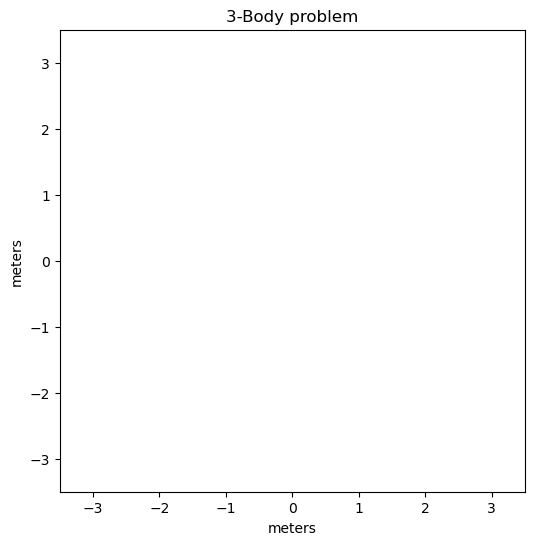

In [17]:
# Setup the figure and axes

fig, ax = plt.subplots(figsize=(6,6))
ax.set(xlim=(-3.5, 3.5), ylim=(-3.5, 3.5), ylabel="meters", xlabel="meters", title="3-Body problem")


In [18]:
# parameters of the problem
T = 10. #2
m = 1.0 #kg
ks = 5 #N/m
r0 = 1. #m

In [19]:
# setting a timestep to be 50 ms
dt = 0.05 #s
N = int(T/dt)

In [20]:
# Allocating arrays for 2D problem: first axis -time, second axis - particle's number. thrid - coordinate
v = np.zeros((N+1, 3, 2))
r = np.zeros((N+1, 3, 2))
f = np.zeros((N+1, 3, 2))

In [21]:
# initial conditions for 3 particles
r[0,0] = np.array([0., 2.])
r[0,1] = np.array([2., 0.])
r[0,2] = np.array([-1., 0.])

def compute_forces(n):
    """ The function computes forces on each pearticle at time step n"""
    for i in range(3):
        for j in range(3):
            if i != j:
                rij = r[n,i] - r[n,j]
                rij_abs = np.linalg.norm(rij)
                f[n,i] -= ks * (rij_abs -r0) * rij / rij_abs

In [22]:
# Run dynamics
for n in range(N):
    compute_forces(n)
    v[n+1] = v[n] +f[n]/m*dt
    r[n+1] = r[n] + v[n+1]*dt

In [23]:
# drawing and animating
scat = ax.scatter(r[0,:,0], r[0,:,1], marker="o", c=["b", "k", "r"], s=1000)

def animate(i):
    scat.set_offsets(r[i])

ani = animation.FuncAnimation(fig, animate, frames=N)
plt.close()

In [25]:
# this function will create a lot of *.png files in a folder "3 Body_frames"
ani.save("3body.html", writer=animation.HTMLWriter(fps=1//dt))

In [26]:
HTML("3body.html")